* all_688 stores the original released data inside each folder
* aff_neurons stores the affine result inside each brain folder's affine folder
* aff_600 stores all the affine result in the aff_neurons to the single folder

In [1]:
import pandas as pd
import os
brain_regis = pd.read_excel(os.path.join('/home/penglab/Documents/result', 'brain_registration.xlsx'), index_col=[0], skiprows=[0],
                            names=['ID', 'y_initial', 'x_initial', 'z_initial', 'y_after', 'x_after', 'z_after',
                                   'ration', 'flip', 'flip_axis'])
brain_regis.loc[:, 'x_downsample'] = brain_regis.loc[:, 'x_initial'] / brain_regis.loc[:, 'x_after']
brain_regis.loc[:, 'y_downsample'] = brain_regis.loc[:, 'y_initial'] / brain_regis.loc[:, 'y_after']
brain_regis.loc[:, 'z_downsample'] = brain_regis.loc[:, 'z_initial'] / brain_regis.loc[:, 'z_after']
brain_regis.drop_duplicates(keep='first', inplace=True)
brain_regis.fillna(value='NA', inplace=True)
brain_regis = brain_regis.loc[~brain_regis.index.duplicated(keep='first')]
brain_regis.loc[:, 'x_initial'] = brain_regis.loc[:, 'x_initial'].astype(float)
brain_regis.loc[:, 'y_initial'] = brain_regis.loc[:, 'y_initial'].astype(float)
brain_regis.loc[:, 'z_initial'] = brain_regis.loc[:, 'z_initial'].astype(float)

In [2]:
brain_regis

,y_initial,x_initial,z_initial,y_after,x_after,z_after,ration,flip,flip_axis,x_downsample,y_downsample,z_downsample
ID,,,,,,,,,,,,
17109,35000.0,22793.0,10533.0,547,356,659,xy64z16,0,NA,64.0253,63.9854,15.9833
17302,54600.0,34412.0,9847.0,853,537,615,xy64z16,0,NA,64.0819,64.0094,16.0114
17541,54600.0,39328.0,11073.0,426,307,346,xy128z32,0,NA,128.104,128.169,32.0029
17542,54600.0,34748.0,11333.0,426,271,354,x128.221y128z32,0,NA,128.221,128.169,32.0141
17545,54600.0,35989.0,10750.0,853,562,671,xy64z16,0,NA,64.0374,64.0094,16.0209
17781,54600.0,34722.0,11021.0,426,271,344,x128.125y128.17z32,0,NA,128.125,128.169,32.0378
17782,28000.0,45000.0,11786.0,437,703,736,xy64z16,1,Y,64.0114,64.0732,16.0136
17787,24275.0,36400.0,11478.0,189,284,358,x128.17y128.44z32,0,NA,128.169,128.439,32.0615
17788,27188.0,35000.0,11120.0,212,273,347,128.205y128.245z32,1,Y,128.205,128.245,32.0461


### Check the resulted affinement neurons generated by me

In [3]:
import os
aff_folder = '/home/penglab/Documents/result/aff_neurons'
aff_Problem = []

for i_brain in os.listdir(aff_folder):
    
    if int(i_brain) not in brain_regis.index.tolist():
        print('\nSkip '+str(i_brain))
        continue
    print('\n--------- Process brain '+str(i_brain))
    print('------------- '+str(len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))))+' neurons in total')
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    error_c = 0
    
    for iter_swc in os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(os.path.join(aff_folder, i_brain),'affine'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        neuron_info
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            flag_E = True
            #print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            flag_E = True
            #print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_c = error_c +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_c/len(os.listdir(os.path.join(os.path.join(aff_folder, i_brain),'affine'))),2))+'% neurons have error')


--------- Process brain 17302
------------- 93 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17545
------------- 87 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17781
------------- 4 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17782
------------- 6 neurons in total
------------- 100.0% neurons have error

Skip 18452

--------- Process brain 18454
------------- 85 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18455
------------- 80 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18457
------------- 110 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18458
------------- 43 neurons in total
------------- 0.0% neurons have error

Skip 18462

Skip 18463

--------- Process brain 18464
------------- 25 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18465
-----

### Check the resulted affinement neurons generated by AHU

In [4]:
aff_folder = '/home/penglab/Documents/result/2_affine_swc'
aff_Problem = []

for i_brain in os.listdir(aff_folder):
    if int(i_brain) not in brain_regis.index.tolist():
        print('\nSkip '+str(i_brain))
        continue
    print('\n--------- Process brain '+str(i_brain))
    print('------------- '+str(len(os.listdir(os.path.join(aff_folder, i_brain))))+' neurons in total')
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    error_c = 0
    
    for iter_swc in os.listdir(os.path.join(aff_folder, i_brain)):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(aff_folder, i_brain),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        neuron_info
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound))     
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_c = error_c +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_c/len(os.listdir(os.path.join(aff_folder, i_brain))),2))+'% neurons have error')


--------- Process brain 18464
------------- 25 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17782
------------- 6 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18465
------------- 61 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18458
------------- 43 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17302
------------- 93 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18455
------------- 80 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18869
------------- 6 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17545
------------- 87 neurons in total
------------- 0.0% neurons have error

--------- Process brain 17781
------------- 4 neurons in total
------------- 0.0% neurons have error

--------- Process brain 18457
------------- 110 neurons in total
----------

### Compare the SEU affinement result with the AHU one

In [8]:
AHU_path = '/home/penglab/Documents/result/ahu_aff'
SEU_path = '/home/penglab/Documents/result/seu_aff'
brain_L = []
for i_swc in os.listdir('/home/penglab/Documents/result/seu_aff'):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)

In [9]:
SEU_neuron  = []#688
path = '/home/penglab/Documents/result/all_688'
for i_folder in os.listdir('/home/penglab/Documents/result/all_688'):
    for i_swc in os.listdir(os.path.join('/home/penglab/Documents/result/all_688',i_folder)):
        (neuronname,extension) = os.path.splitext(i_swc)
        (neuronname,extension) = os.path.splitext(neuronname)
        (neuronname,extension) = os.path.splitext(neuronname)
        (neuronname,extension) = os.path.splitext(neuronname)
        SEU_neuron .append(neuronname)

AHU_aff = []#671
for i_swc in list(set(os.listdir(AHU_path)) - set(os.listdir(SEU_path))):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    AHU_aff.append(neuronname)
    #if neuronname not in SEU_neuron :
        #print(neuronname)
print('There are '+ str(len(list(set(SEU_neuron ) - set(AHU_aff)))) + ' neurons that are in SEU but not in AHU')
#print('\t'+str(list(set(SEU_neuron ) - set(AHU_aff))))
print('\nThere are '+ str(len([val for val in SEU_neuron if val in AHU_aff] )) + ' neurons that are in both')
#print('\t'+str(list(set(AHU_aff) - set(SEU_neuron ))))

List_600 = [val for val in SEU_neuron if val in AHU_aff]

There are 88 neurons that are in SEU but not in AHU

There are 600 neurons that are in both


In [10]:
import numpy as np
compareDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])

iter_i = 1
for i_swc in os.listdir(SEU_path):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in List_600 :
        print('Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    compareDF.loc[iter_i,"brain"] = brain_temp
    compareDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(AHU_path):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre = os.path.join(AHU_path,i_swc_old)
    path_cur = os.path.join(SEU_path,i_swc)
    n_skip = 0
    with open(path_pre, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    compareDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    compareDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    compareDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    compareDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    compareDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    compareDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(compareDF.shape[0])+' neurons to be compared in this table')

Processing neuron 17302_00001
Processing neuron 17302_00002
Processing neuron 17302_00003
Processing neuron 17302_00005
Processing neuron 17302_00006
Processing neuron 17302_00007
Processing neuron 17302_00009
Processing neuron 17302_00010
Processing neuron 17302_00011
Processing neuron 17302_00013
Processing neuron 17302_00014
Processing neuron 17302_00015
Processing neuron 17302_00016
Processing neuron 17302_00017
Processing neuron 17302_00018
Processing neuron 17302_00019
Processing neuron 17302_00020
Processing neuron 17302_00021
Processing neuron 17302_00023
Processing neuron 17302_00024
Processing neuron 17302_00025
Processing neuron 17302_00027
Processing neuron 17302_00030
Processing neuron 17302_00031
Processing neuron 17302_00032
Processing neuron 17302_00033
Processing neuron 17302_00034
Processing neuron 17302_00035
Processing neuron 17302_00036
Processing neuron 17302_00037
Processing neuron 17302_00038
Processing neuron 17302_00039
Processing neuron 17302_00040
Processing

Processing neuron 18455_00009
Processing neuron 18455_00012
Processing neuron 18455_00013
Processing neuron 18455_00014
Processing neuron 18455_00015
Processing neuron 18455_00016
Processing neuron 18455_00017
Processing neuron 18455_00018
Processing neuron 18455_00019
Processing neuron 18455_00020
Processing neuron 18455_00021
Processing neuron 18455_00022
Processing neuron 18455_00023
Processing neuron 18455_00026
Processing neuron 18455_00030
Processing neuron 18455_00033
Processing neuron 18455_00041
Processing neuron 18455_00042
Processing neuron 18455_00043
Processing neuron 18455_00045
Processing neuron 18455_00046
Processing neuron 18455_00047
Processing neuron 18455_00048
Processing neuron 18455_00049
Processing neuron 18455_00050
Processing neuron 18455_00106
Processing neuron 18455_00120
Processing neuron 18455_00121
Processing neuron 18455_00122
Processing neuron 18455_00123
Processing neuron 18455_00125
Processing neuron 18455_00126
Processing neuron 18455_00127
Processing

Processing neuron 18465_00054
Processing neuron 18465_00078
Processing neuron 18465_00080
Processing neuron 18465_00090
Processing neuron 18465_00111
Processing neuron 18465_00113
Processing neuron 18465_00116
Processing neuron 18465_00117
Processing neuron 18465_00119
Processing neuron 18465_00132
Processing neuron 18465_00136
Processing neuron 18465_00145
Processing neuron 18465_00146
Processing neuron 18465_00152
Processing neuron 18465_00154
Processing neuron 18465_00155
Processing neuron 18465_00156
Processing neuron 18465_00159
Processing neuron 18465_00168
Processing neuron 18465_00205
Processing neuron 18465_00206
Processing neuron 18465_00207
Processing neuron 18465_00209
Processing neuron 18465_00213
Processing neuron 18465_00226
Processing neuron 18465_00233
Processing neuron 18465_00234
Processing neuron 18465_00241
Processing neuron 18465_00246
Processing neuron 18465_00248
Processing neuron 18465_00261
Processing neuron 18465_00264
Processing neuron 18465_00285
Processing

In [11]:
import seaborn as sns
compareDF.loc[:, 'brain'] = compareDF.loc[:, 'brain'].astype(int)
compareDF.loc[:,'idx'] = compareDF.index.tolist()
compareDF.loc[:, 'pre_x'] = compareDF.loc[:, 'pre_x'].astype(float)
compareDF.loc[:, 'pre_y'] = compareDF.loc[:, 'pre_y'].astype(float)
compareDF.loc[:, 'pre_z'] = compareDF.loc[:, 'pre_z'].astype(float)
compareDF.loc[:,'subx'] = compareDF.loc[:,'pre_x'] - compareDF.loc[:,'cur_x']
compareDF.loc[:,'suby'] = compareDF.loc[:,'pre_y'] - compareDF.loc[:,'cur_y']
compareDF.loc[:,'subz'] = compareDF.loc[:,'pre_z'] - compareDF.loc[:,'cur_z']
compareDF.loc[:, 'subx'] = compareDF.loc[:, 'subx'].astype(float)
compareDF.loc[:, 'suby'] = compareDF.loc[:, 'suby'].astype(float)
compareDF.loc[:, 'subz'] = compareDF.loc[:, 'subz'].astype(float)
resultILL = pd.DataFrame(index = range(1,compareDF.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
resultILL.loc[:, 'idx'] = resultILL.index.tolist()
resultILL.loc[:, 'axisV'] = resultILL.loc[:, 'axisV'].astype(float)
resultILL.loc[range(1,601), 'brain'] = compareDF.loc[:,'brain'].tolist()
resultILL.loc[range(1,601),'axisV']=compareDF.loc[:,'subx'].tolist()
resultILL.loc[range(1,601),'dim']='x'
resultILL.loc[range(1,601),'neuronID']=compareDF.loc[:, 'neuronID'].tolist()

resultILL.loc[range(601,1201), 'brain'] = compareDF.loc[:,'brain'].tolist()
resultILL.loc[range(601,1201),'axisV']=compareDF.loc[:,'suby'].tolist()
resultILL.loc[range(601,1201),'dim']='y'
resultILL.loc[range(601,1201),'neuronID']=compareDF.loc[:, 'neuronID'].tolist()

resultILL.loc[range(1201,1801), 'brain'] =compareDF.loc[:,'brain'].tolist()
resultILL.loc[range(1201,1801),'axisV']=compareDF.loc[:,'subz'].tolist()
resultILL.loc[range(1201,1801),'dim']='z'
resultILL.loc[range(1201,1801),'neuronID']=compareDF.loc[:, 'neuronID'].tolist()

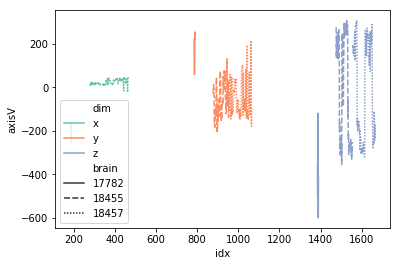

In [12]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=resultILL[np.abs(resultILL['axisV'])>10], palette="Set2")

In [13]:
thre = 10
idx_x = compareDF[np.abs(compareDF['subx'])>thre].index.tolist()
idx_y = compareDF[np.abs(compareDF['suby'])>thre].index.tolist()
idx_z = compareDF[np.abs(compareDF['subz'])>thre].index.tolist()

In [14]:
errorL = list(set(idx_x).union(idx_y,idx_z))
brainL, count = np.unique(compareDF['brain'], return_counts=True)
errorDF = compareDF.loc[errorL,:].copy()
for i_b in brainL:
    ori_neuron = compareDF[compareDF['brain']==i_b].shape[0]
    err_neuron = errorDF[errorDF['brain']==i_b].shape[0]
    print('Error rate of affinement for brain '+str(i_b)+' is '+ str(err_neuron/ori_neuron))

Error rate of affinement for brain 17302 is 0.0
Error rate of affinement for brain 17545 is 0.0
Error rate of affinement for brain 17781 is 0.0
Error rate of affinement for brain 17782 is 1.0
Error rate of affinement for brain 18454 is 0.0
Error rate of affinement for brain 18455 is 1.0
Error rate of affinement for brain 18457 is 1.0
Error rate of affinement for brain 18458 is 0.0
Error rate of affinement for brain 18464 is 0.0
Error rate of affinement for brain 18465 is 0.0
Error rate of affinement for brain 18869 is 0.0


## Check brain 18457 and 17782's resample result
* aff_neurons stores the affine result of SEU inside each brain folder's affine folder

In [15]:
path_temp = '/home/penglab/Documents/result/aff_neurons'
error_r = 0
for i_brain in ['18457','17782']:
    path_brain = os.path.join(path_temp,i_brain)
    # specific downsample size for the i_brain
    x_aff_bound = brain_regis.loc[int(i_brain), 'x_after']
    y_aff_bound = brain_regis.loc[int(i_brain), 'y_after']
    z_aff_bound = brain_regis.loc[int(i_brain), 'z_after']
    for iter_swc in os.listdir(os.path.join(path_brain, 'resample')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(path_brain, 'resample'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound))     
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if flag_E:
            error_r = error_r +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_r/len(os.listdir(os.path.join(path_brain, 'resample'))),2))+'% neurons have exceeds the boundary in brain '+ str(i_brain))

------------- 0.0% neurons have exceeds the boundary in brain 18457
------------- 0.0% neurons have exceeds the boundary in brain 17782


## Check brain 18457 and 17782's affinemnt result
* aff_neurons stores the affine result of SEU inside each brain folder's affine folder

In [38]:
path_temp = '/home/penglab/Documents/result/aff_neurons'
error_r = 0
for i_brain in ['18457','17782']:
    path_brain = os.path.join(path_temp,i_brain)
    # specific downsample size for the i_brain
    x_aff_bound = 568
    y_aff_bound = 320
    z_aff_bound = 456
    for iter_swc in os.listdir(os.path.join(path_brain, 'affine')):
        flag_E = False
        if not iter_swc.endswith(("swc", "SWC")):
            continue
        path_swc = os.path.join(os.path.join(path_brain, 'affine'),iter_swc)
        (neuron_info, extension) = os.path.splitext(iter_swc)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        (neuron_info, extension) = os.path.splitext(neuron_info)
        n_skip = 0
        with open(path_swc, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if line.startswith("#"):
                    n_skip += 1
                else:
                    break
        names = ["##n", "type", "x", "y", "z", "r", "parent"]
        swc = pd.read_csv(path_swc, index_col=0, skiprows=n_skip, sep=" ",
                          usecols=[0, 1, 2, 3, 4, 5, 6],
                          names=names
                          )
            
        if not max(swc['x'])< x_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of x is '+ str(max(swc['x']))+', while the boundary is '+str(x_aff_bound))
            flag_E = True
            #print('\tThe x axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['y'])< y_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of y is '+ str(max(swc['y']))+', while the boundary is '+str(y_aff_bound))     
            flag_E = True#print('\tThe y axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if not max(swc['z'])< z_aff_bound:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMaximum value of z is '+ str(max(swc['z']))+', while the boundary is '+str(z_aff_bound))
            flag_E = True#print('\tThe z axis of neuron '+ str(neuron_info)+' has exceeds the boundary' )
        if min(swc['x'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of x is '+ str(min(swc['x'])))
            flag_E = True
        if min(swc['y'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of y is '+ str(min(swc['y'])))
            flag_E = True
        if min(swc['z'])< 0:
            if not flag_E:
                print('\t'+str(neuron_info))
            print('\t\tMinimum value of z is '+ str(min(swc['z'])))
            flag_E = True
        
        if flag_E:
            error_r = error_r +1
            aff_Problem.append(neuron_info)
    print('------------- '+str(round(100*error_r/len(os.listdir(os.path.join(path_brain, 'affine'))),2))+'% neurons have exceeds the boundary in brain '+ str(i_brain))

------------- 0.0% neurons have exceeds the boundary in brain 18457
	17782_00001
		Maximum value of x is 676.387, while the boundary is 568
		Maximum value of z is 839.692, while the boundary is 456
		Minimum value of y is -193.232
	17782_00002
		Maximum value of x is 613.132, while the boundary is 568
		Maximum value of z is 830.538, while the boundary is 456
		Minimum value of y is -171.55599999999998
	17782_00003
		Maximum value of x is 803.1519999999999, while the boundary is 568
		Maximum value of z is 708.0139999999999, while the boundary is 456
		Minimum value of y is -109.499
	17782_00004
		Maximum value of x is 627.323, while the boundary is 568
		Maximum value of z is 777.689, while the boundary is 456
		Minimum value of y is -130.501
	17782_00005
		Maximum value of x is 859.052, while the boundary is 568
		Maximum value of z is 846.275, while the boundary is 456
		Minimum value of y is -186.465
	17782_00006
		Maximum value of x is 867.298, while the boundary is 568
		Maximum

### Compare the resample result

In [20]:
import numpy as np
SEU_path_resam = '/home/penglab/Documents/result/compare_Resample/SEU'
AHU_path_resam = '/home/penglab/Documents/result/compare_Resample/AHU'
resampleDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
ahuRESAMPLE_l = []
for i_swc in os.listdir(AHU_path_resam):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    ahuRESAMPLE_l.append(neuronname)
for i_swc in os.listdir(SEU_path_resam):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in ahuRESAMPLE_l :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    resampleDF.loc[iter_i,"brain"] = brain_temp
    resampleDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(AHU_path_resam):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre_resam = os.path.join(AHU_path_resam,i_swc_old)
    path_cur_resam = os.path.join(SEU_path_resam,i_swc)
    n_skip = 0
    with open(path_pre_resam, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre_resam, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    resampleDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    resampleDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    resampleDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur_resam, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur_resam, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    resampleDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    resampleDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    resampleDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(resampleDF.shape[0])+' neurons to be compared in this table')

Processing neuron 17782_00001
Processing neuron 17782_00002
Processing neuron 17782_00003
Processing neuron 17782_00004
Processing neuron 17782_00005
Processing neuron 17782_00006
Processing neuron 18457_00001
Processing neuron 18457_00002
Processing neuron 18457_00003
Processing neuron 18457_00004
Processing neuron 18457_00005
Processing neuron 18457_00006
Processing neuron 18457_00007
Processing neuron 18457_00008
Processing neuron 18457_00009
Processing neuron 18457_00010
Processing neuron 18457_00012
Processing neuron 18457_00013
Processing neuron 18457_00014
Processing neuron 18457_00015
Processing neuron 18457_00017
Processing neuron 18457_00018
Processing neuron 18457_00019
Processing neuron 18457_00023
Processing neuron 18457_00025
Processing neuron 18457_00027
Processing neuron 18457_00028
Processing neuron 18457_00029
Processing neuron 18457_00030
Processing neuron 18457_00031
Processing neuron 18457_00032
Processing neuron 18457_00033
Processing neuron 18457_00034
Processing

In [21]:
import seaborn as sns
resampleDF.loc[:, 'brain'] = resampleDF.loc[:, 'brain'].astype(int)
resampleDF.loc[:,'idx'] = resampleDF.index.tolist()
resampleDF.loc[:, 'pre_x'] = resampleDF.loc[:, 'pre_x'].astype(float)
resampleDF.loc[:, 'pre_y'] = resampleDF.loc[:, 'pre_y'].astype(float)
resampleDF.loc[:, 'pre_z'] = resampleDF.loc[:, 'pre_z'].astype(float)
resampleDF.loc[:,'subx'] = resampleDF.loc[:,'pre_x'] - resampleDF.loc[:,'cur_x']
resampleDF.loc[:,'suby'] = resampleDF.loc[:,'pre_y'] - resampleDF.loc[:,'cur_y']
resampleDF.loc[:,'subz'] = resampleDF.loc[:,'pre_z'] - resampleDF.loc[:,'cur_z']
resampleDF.loc[:, 'subx'] = resampleDF.loc[:, 'subx'].astype(float)
resampleDF.loc[:, 'suby'] = resampleDF.loc[:, 'suby'].astype(float)
resampleDF.loc[:, 'subz'] = resampleDF.loc[:, 'subz'].astype(float)
resamLL = pd.DataFrame(index = range(1,resampleDF.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
resamLL.loc[:, 'idx'] = np.tile(range(1,resampleDF.shape[0]+1), 3)
resamLL.loc[:, 'axisV'] = resamLL.loc[:, 'axisV'].astype(float)
resamLL.loc[range(1,117), 'brain'] = resampleDF.loc[:,'brain'].tolist()
resamLL.loc[range(1,117),'axisV']=resampleDF.loc[:,'subx'].tolist()
resamLL.loc[range(1,117),'dim']='x'
resamLL.loc[range(1,117),'neuronID']=resampleDF.loc[:, 'neuronID'].tolist()

resamLL.loc[range(117,116*2+1), 'brain'] = resampleDF.loc[:,'brain'].tolist()
resamLL.loc[range(117,116*2+1),'axisV']=resampleDF.loc[:,'suby'].tolist()
resamLL.loc[range(117,116*2+1),'dim']='y'
resamLL.loc[range(117,116*2+1),'neuronID']=resampleDF.loc[:, 'neuronID'].tolist()

resamLL.loc[range(116*2+1,116*3+1), 'brain'] =resampleDF.loc[:,'brain'].tolist()
resamLL.loc[range(116*2+1,116*3+1),'axisV']=resampleDF.loc[:,'subz'].tolist()
resamLL.loc[range(116*2+1,116*3+1),'dim']='z'
resamLL.loc[range(116*2+1,116*3+1),'neuronID']=resampleDF.loc[:, 'neuronID'].tolist()

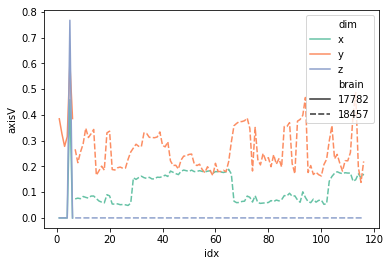

In [22]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=resamLL, palette="Set2")

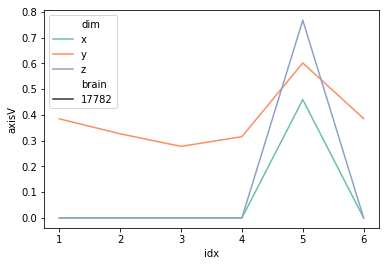

In [23]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=resamLL[resamLL['brain']==17782], palette="Set2")

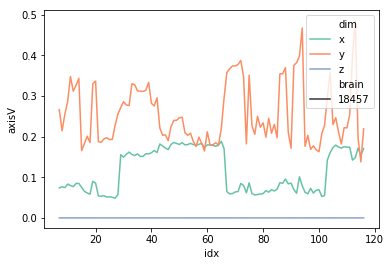

In [24]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=resamLL[resamLL['brain']==18457], palette="Set2")

### ↑ Therefore, the resample result between SEU and AHU does not shift too much

### Below comparing the affine result

In [25]:
import numpy as np
SEU_path_raff = '/home/penglab/Documents/result/compare_aff/SEU'
AHU_path_raff = '/home/penglab/Documents/result/compare_aff/AHU'
affDF = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
ahuaff_l = []
for i_swc in os.listdir(AHU_path_raff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    ahuaff_l.append(neuronname)
for i_swc in os.listdir(SEU_path_raff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in ahuaff_l :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    affDF.loc[iter_i,"brain"] = brain_temp
    affDF.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(AHU_path_raff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_pre_raff = os.path.join(AHU_path_raff,i_swc_old)
    path_cur_raff = os.path.join(SEU_path_raff,i_swc)
    n_skip = 0
    with open(path_pre_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_pre_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_cur_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_cur_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF.shape[0])+' neurons to be compared in this table')

Processing neuron 18457_00001
Processing neuron 18457_00002
Processing neuron 18457_00003
Processing neuron 18457_00004
Processing neuron 18457_00005
Processing neuron 18457_00006
Processing neuron 18457_00007
Processing neuron 18457_00008
Processing neuron 18457_00009
Processing neuron 18457_00010
Processing neuron 18457_00012
Processing neuron 18457_00013
Processing neuron 18457_00014
Processing neuron 18457_00015
Processing neuron 18457_00017
Processing neuron 18457_00018
Processing neuron 18457_00019
Processing neuron 18457_00023
Processing neuron 18457_00025
Processing neuron 18457_00027
Processing neuron 18457_00028
Processing neuron 18457_00029
Processing neuron 18457_00030
Processing neuron 18457_00031
Processing neuron 18457_00032
Processing neuron 18457_00033
Processing neuron 18457_00034
Processing neuron 18457_00035
Processing neuron 18457_00036
Processing neuron 18457_00037
Processing neuron 18457_00038
Processing neuron 18457_00039
Processing neuron 18457_00040
Processing

In [26]:
import seaborn as sns
affDF.loc[:, 'brain'] = affDF.loc[:, 'brain'].astype(int)
affDF.loc[:,'idx'] = affDF.index.tolist()
affDF.loc[:, 'pre_x'] = affDF.loc[:, 'pre_x'].astype(float)
affDF.loc[:, 'pre_y'] = affDF.loc[:, 'pre_y'].astype(float)
affDF.loc[:, 'pre_z'] = affDF.loc[:, 'pre_z'].astype(float)
affDF.loc[:,'subx'] = affDF.loc[:,'pre_x'] - affDF.loc[:,'cur_x']
affDF.loc[:,'suby'] = affDF.loc[:,'pre_y'] - affDF.loc[:,'cur_y']
affDF.loc[:,'subz'] = affDF.loc[:,'pre_z'] - affDF.loc[:,'cur_z']
affDF.loc[:, 'subx'] = affDF.loc[:, 'subx'].astype(float)
affDF.loc[:, 'suby'] = affDF.loc[:, 'suby'].astype(float)
affDF.loc[:, 'subz'] = affDF.loc[:, 'subz'].astype(float)
affILL = pd.DataFrame(index = range(1,affDF.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL.loc[:, 'idx'] = np.tile(range(1,affDF.shape[0]+1), 3)
affILL.loc[:, 'axisV'] = affILL.loc[:, 'axisV'].astype(float)
affILL.loc[range(1,117), 'brain'] = affDF.loc[:,'brain'].tolist()
affILL.loc[range(1,117),'axisV']=affDF.loc[:,'subx'].tolist()
affILL.loc[range(1,117),'dim']='x'
affILL.loc[range(1,117),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[range(117,116*2+1), 'brain'] = affDF.loc[:,'brain'].tolist()
affILL.loc[range(117,116*2+1),'axisV']=affDF.loc[:,'suby'].tolist()
affILL.loc[range(117,116*2+1),'dim']='y'
affILL.loc[range(117,116*2+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

affILL.loc[range(116*2+1,116*3+1), 'brain'] =affDF.loc[:,'brain'].tolist()
affILL.loc[range(116*2+1,116*3+1),'axisV']=affDF.loc[:,'subz'].tolist()
affILL.loc[range(116*2+1,116*3+1),'dim']='z'
affILL.loc[range(116*2+1,116*3+1),'neuronID']=affDF.loc[:, 'neuronID'].tolist()

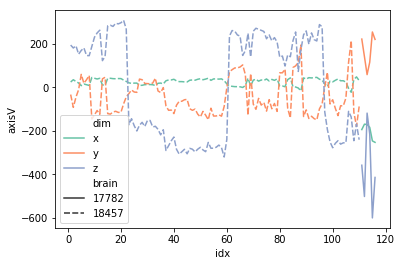

In [27]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL, palette="Set2")

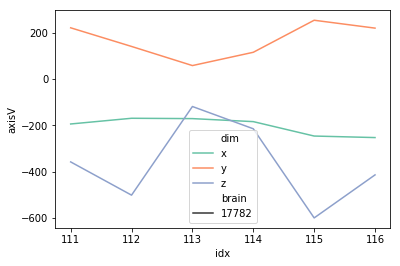

In [28]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL[affILL['brain']==17782], palette="Set2")

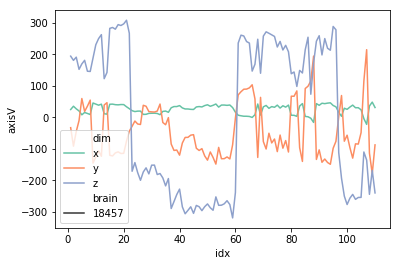

In [29]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL[affILL['brain']==18457], palette="Set2")

### Rerun the affine process, see SEU1 AND SEU2

In [30]:
import numpy as np
SEU1_path_aff = '/home/penglab/Documents/result/compare_aff2/SEU1'
SEU2_path_aff = '/home/penglab/Documents/result/compare_aff2/SEU2'
affDF2 = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
ahuaff_l = []
for i_swc in os.listdir(SEU2_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    ahuaff_l.append(neuronname)
for i_swc in os.listdir(SEU1_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in ahuaff_l :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    affDF2.loc[iter_i,"brain"] = brain_temp
    affDF2.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(SEU2_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_1_raff = os.path.join(SEU2_path_aff,i_swc_old)
    path_2_raff = os.path.join(SEU1_path_aff,i_swc)
    n_skip = 0
    with open(path_1_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_1_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF2.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF2.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF2.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_2_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_2_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF2.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF2.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF2.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF2.shape[0])+' neurons to be compared in this table')

Processing neuron 17782_00001
Processing neuron 17782_00002
Processing neuron 17782_00003
Processing neuron 17782_00004
Processing neuron 17782_00005
Processing neuron 17782_00006
Processing neuron 18457_00001
Processing neuron 18457_00002
Processing neuron 18457_00003
Processing neuron 18457_00004
Processing neuron 18457_00005
Processing neuron 18457_00006
Processing neuron 18457_00007
Processing neuron 18457_00008
Processing neuron 18457_00009
Processing neuron 18457_00010
Processing neuron 18457_00012
Processing neuron 18457_00013
Processing neuron 18457_00014
Processing neuron 18457_00015
Processing neuron 18457_00017
Processing neuron 18457_00018
Processing neuron 18457_00019
Processing neuron 18457_00023
Processing neuron 18457_00025
Processing neuron 18457_00027
Processing neuron 18457_00028
Processing neuron 18457_00029
Processing neuron 18457_00030
Processing neuron 18457_00031
Processing neuron 18457_00032
Processing neuron 18457_00033
Processing neuron 18457_00034
Processing

In [31]:
import seaborn as sns
affDF2.loc[:, 'brain'] = affDF2.loc[:, 'brain'].astype(int)
affDF2.loc[:,'idx'] = affDF2.index.tolist()
affDF2.loc[:, 'pre_x'] = affDF2.loc[:, 'pre_x'].astype(float)
affDF2.loc[:, 'pre_y'] = affDF2.loc[:, 'pre_y'].astype(float)
affDF2.loc[:, 'pre_z'] = affDF2.loc[:, 'pre_z'].astype(float)
affDF2.loc[:,'subx'] = affDF2.loc[:,'pre_x'] - affDF2.loc[:,'cur_x']
affDF2.loc[:,'suby'] = affDF2.loc[:,'pre_y'] - affDF2.loc[:,'cur_y']
affDF2.loc[:,'subz'] = affDF2.loc[:,'pre_z'] - affDF2.loc[:,'cur_z']
affDF2.loc[:, 'subx'] = affDF2.loc[:, 'subx'].astype(float)
affDF2.loc[:, 'suby'] = affDF2.loc[:, 'suby'].astype(float)
affDF2.loc[:, 'subz'] = affDF2.loc[:, 'subz'].astype(float)
affILL2 = pd.DataFrame(index = range(1,affDF2.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL2.loc[:, 'idx'] = np.tile(range(1,affDF2.shape[0]+1), 3)
affILL2.loc[:, 'axisV'] = affILL2.loc[:, 'axisV'].astype(float)
affILL2.loc[range(1,117), 'brain'] = affDF2.loc[:,'brain'].tolist()
affILL2.loc[range(1,117),'axisV']=affDF2.loc[:,'subx'].tolist()
affILL2.loc[range(1,117),'dim']='x'
affILL2.loc[range(1,117),'neuronID']=affDF2.loc[:, 'neuronID'].tolist()

affILL2.loc[range(117,116*2+1), 'brain'] = affDF2.loc[:,'brain'].tolist()
affILL2.loc[range(117,116*2+1),'axisV']=affDF2.loc[:,'suby'].tolist()
affILL2.loc[range(117,116*2+1),'dim']='y'
affILL2.loc[range(117,116*2+1),'neuronID']=affDF2.loc[:, 'neuronID'].tolist()

affILL2.loc[range(116*2+1,116*3+1), 'brain'] =affDF2.loc[:,'brain'].tolist()
affILL2.loc[range(116*2+1,116*3+1),'axisV']=affDF2.loc[:,'subz'].tolist()
affILL2.loc[range(116*2+1,116*3+1),'dim']='z'
affILL2.loc[range(116*2+1,116*3+1),'neuronID']=affDF2.loc[:, 'neuronID'].tolist()

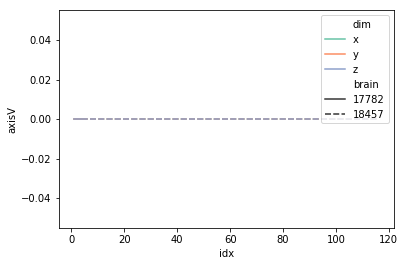

In [32]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL2, palette="Set2")

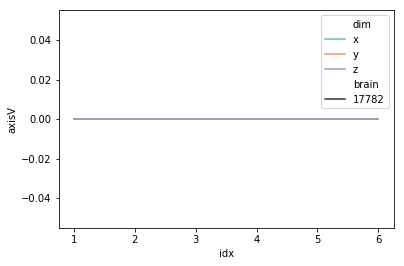

In [33]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL2[affILL2['brain']==17782], palette="Set2")

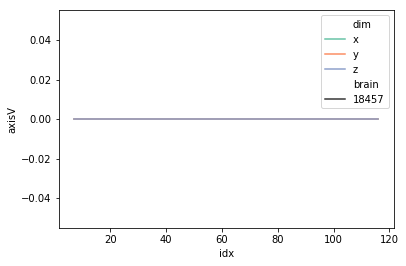

In [34]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL2[affILL2['brain']==18457], palette="Set2")

### ↑ Therefore, the affine result of the same resample files are stable
### Use AHU's resample result to run the affine steps, compared with SEU

In [35]:
import numpy as np
SEU1_path_aff = '/home/penglab/Documents/result/compare_aff3/SEU1'
AHU2_path_aff = '/home/penglab/Documents/result/compare_aff3/AHU2'
affDF3 = pd.DataFrame(columns=["brain","neuronID","pre_x","pre_y","pre_z","cur_x","cur_y","cur_z"])
iter_i = 1
ahuaff_l = []
for i_swc in os.listdir(AHU2_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    ahuaff_l.append(neuronname)
for i_swc in os.listdir(SEU1_path_aff):
    (neuronname,extension) = os.path.splitext(i_swc)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    (neuronname,extension) = os.path.splitext(neuronname)
    if neuronname not in ahuaff_l :
        print('********Skip '+ str(neuronname))
        continue
    print('Processing neuron '+ str(neuronname))
    brain_temp = neuronname.split("_")[0]
    brain_L.append(brain_temp)
    affDF3.loc[iter_i,"brain"] = brain_temp
    affDF3.loc[iter_i,"neuronID"] = neuronname
    for find_i in os.listdir(AHU2_path_aff):
        if find_i.startswith(neuronname):
            i_swc_old = find_i
    path_1_raff = os.path.join(AHU2_path_aff,i_swc_old)
    path_2_raff = os.path.join(SEU1_path_aff,i_swc)
    n_skip = 0
    with open(path_1_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_1_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF3.loc[iter_i,"pre_x"] = np.mean(swc['x'])
    affDF3.loc[iter_i,"pre_y"] = np.mean(swc['y'])
    affDF3.loc[iter_i,"pre_z"] = np.mean(swc['z'])
    n_skip = 0
    with open(path_2_raff, "r") as f:
        for line in f.readlines():
            line = line.strip()
            if line.startswith("#"):
                n_skip += 1
            else:
                break
    names = ["##n", "type", "x", "y", "z", "r", "parent"]
    swc = pd.read_csv(path_2_raff, index_col=0, skiprows=n_skip, sep=" ",
                      usecols=[0, 1, 2, 3, 4, 5, 6],
                      names=names
                          )
    affDF3.loc[iter_i,"cur_x"] = np.mean(swc['x'])
    affDF3.loc[iter_i,"cur_y"] = np.mean(swc['y'])
    affDF3.loc[iter_i,"cur_z"] = np.mean(swc['z'])
    iter_i = iter_i + 1
print('There are '+str(affDF3.shape[0])+' neurons to be compared in this table')
import seaborn as sns
affDF3.loc[:, 'brain'] = affDF3.loc[:, 'brain'].astype(int)
affDF3.loc[:,'idx'] = affDF3.index.tolist()
affDF3.loc[:, 'pre_x'] = affDF3.loc[:, 'pre_x'].astype(float)
affDF3.loc[:, 'pre_y'] = affDF3.loc[:, 'pre_y'].astype(float)
affDF3.loc[:, 'pre_z'] = affDF3.loc[:, 'pre_z'].astype(float)
affDF3.loc[:,'subx'] = affDF3.loc[:,'pre_x'] - affDF3.loc[:,'cur_x']
affDF3.loc[:,'suby'] = affDF3.loc[:,'pre_y'] - affDF3.loc[:,'cur_y']
affDF3.loc[:,'subz'] = affDF3.loc[:,'pre_z'] - affDF3.loc[:,'cur_z']
affDF3.loc[:, 'subx'] = affDF3.loc[:, 'subx'].astype(float)
affDF3.loc[:, 'suby'] = affDF3.loc[:, 'suby'].astype(float)
affDF3.loc[:, 'subz'] = affDF3.loc[:, 'subz'].astype(float)
affILL3 = pd.DataFrame(index = range(1,affDF3.shape[0]*3+1),columns = ['idx','brain','neuronID','dim','axisV'])
affILL3.loc[:, 'idx'] = np.tile(range(1,affDF3.shape[0]+1), 3)
affILL3.loc[:, 'axisV'] = affILL3.loc[:, 'axisV'].astype(float)
affILL3.loc[range(1,117), 'brain'] = affDF3.loc[:,'brain'].tolist()
affILL3.loc[range(1,117),'axisV']=affDF3.loc[:,'subx'].tolist()
affILL3.loc[range(1,117),'dim']='x'
affILL3.loc[range(1,117),'neuronID']=affDF3.loc[:, 'neuronID'].tolist()

affILL3.loc[range(117,116*2+1), 'brain'] = affDF3.loc[:,'brain'].tolist()
affILL3.loc[range(117,116*2+1),'axisV']=affDF3.loc[:,'suby'].tolist()
affILL3.loc[range(117,116*2+1),'dim']='y'
affILL3.loc[range(117,116*2+1),'neuronID']=affDF3.loc[:, 'neuronID'].tolist()

affILL3.loc[range(116*2+1,116*3+1), 'brain'] =affDF3.loc[:,'brain'].tolist()
affILL3.loc[range(116*2+1,116*3+1),'axisV']=affDF3.loc[:,'subz'].tolist()
affILL3.loc[range(116*2+1,116*3+1),'dim']='z'
affILL3.loc[range(116*2+1,116*3+1),'neuronID']=affDF3.loc[:, 'neuronID'].tolist()

Processing neuron 18457_00062
Processing neuron 18457_00063
Processing neuron 18457_00066
Processing neuron 18457_00069
Processing neuron 18457_00072
Processing neuron 18457_00073
Processing neuron 18457_00074
Processing neuron 18457_00075
Processing neuron 18457_00076
Processing neuron 18457_00077
Processing neuron 18457_00078
Processing neuron 18457_00079
Processing neuron 18457_00080
Processing neuron 18457_00081
Processing neuron 18457_00082
Processing neuron 18457_00083
Processing neuron 18457_00087
Processing neuron 18457_00088
Processing neuron 18457_00089
Processing neuron 18457_00090
Processing neuron 18457_00091
Processing neuron 18457_00096
Processing neuron 18457_00097
Processing neuron 18457_00098
Processing neuron 18457_00099
Processing neuron 18457_00101
Processing neuron 18457_00102
Processing neuron 18457_00103
Processing neuron 18457_00106
Processing neuron 18457_00108
Processing neuron 18457_00110
Processing neuron 18457_00111
Processing neuron 18457_00113
Processing

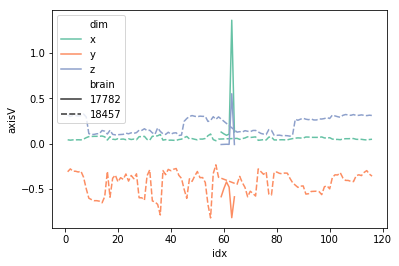

In [36]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL3, palette="Set2")

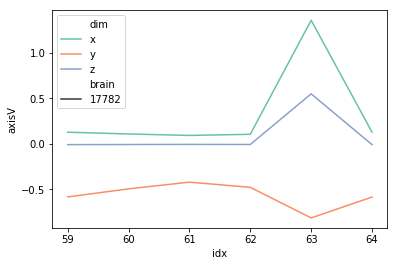

In [39]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL3[affILL3['brain']==17782], palette="Set2")

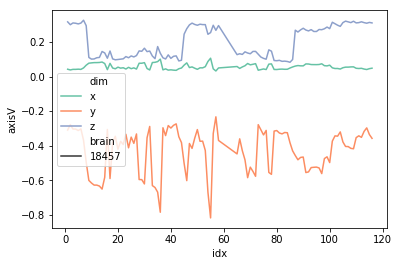

In [40]:
sns.lineplot(x='idx', y= 'axisV',hue='dim',style='brain',data=affILL3[affILL3['brain']==18457], palette="Set2")

In [ ]:
### ↑ Therefore, the affine result of the same resample files are stable
### Use AHU's resample result to run the affine steps, compared with SEU